# 计算机视觉

三种基本任务：
1. 图像识别
2. 目标检测（定位，识别）
3. 分割（像素级别的分类，找出物体的边界）
    - 语义分割
    - 实例分割
    - 粗粒度分割/细粒度分割

## 经典数据集
- MNIST 手写数字
    - Fashion—MNIST 衣物用品
    - KuzushijiMNIST 日语手写平假名
    - QMNIST 
    - Omniglot 全语种字符 “一次性学习”
    - USPS
    - SVHN

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
import torchvision
import torchvision.transforms as transforms

In [3]:
fmnist = torchvision.datasets.FashionMNIST(root = '/Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST'
                                         ,train = True
                                         ,download = False
                                         ,transform = transforms.ToTensor())

In [4]:
svhn = torchvision.datasets.SVHN(root='/Users/feishuoren/Projects/pytorch_learning/Datasets/SVHN'
                                 , split='train' # 训练集、测试集
                                 , transform=transforms.ToTensor()
                                 , download=False)

In [5]:
omnist = torchvision.datasets.Omniglot(root = '/Users/feishuoren/Projects/pytorch_learning/Datasets/Omniglot'
                                         ,background = True # 训练集、测试集
                                         ,download = False
                                         ,transform = transforms.ToTensor())

In [6]:
fmnist

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
omnist

Dataset Omniglot
    Number of datapoints: 19280
    Root location: /Users/feishuoren/Projects/pytorch_learning/Datasets/Omniglot/omniglot-py
    StandardTransform
Transform: ToTensor()

In [8]:
svhn

Dataset SVHN
    Number of datapoints: 73257
    Root location: /Users/feishuoren/Projects/pytorch_learning/Datasets/SVHN
    Split: train
    StandardTransform
Transform: ToTensor()

In [9]:
omnist.__len__() # 查看样本量

19280

In [10]:
len(omnist) # 查看样本量

19280

In [11]:
# 只能看见数据量
# fmnist.targets
# 其他数据集可以查看源码，看有哪些属性
# 也可以用索引调用单个样本

In [12]:
# 报错概率最低的查看方式
for i in [fmnist,svhn,omnist]:
    for x,y in i:
        print(x.shape,y)
        break

torch.Size([1, 28, 28]) 9
torch.Size([3, 32, 32]) 1
torch.Size([1, 105, 105]) 0


In [13]:
# 可视化
# 在读图时，如果不加 ToTensor 的预处理，很可能直接读出PIL文件
# PIL 可以直接可视化
fmnist = torchvision.datasets.FashionMNIST(root='/Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST'
                                          ,train = True
                                          ,download = False
                                          )

fmnist[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FE9C4DDFD90>, 9)

In [14]:
fmnist[0][0] # 尺寸较小，那以看清吗，可以plt.figure把画布变大

In [15]:
# 当数据集很大时，我们希望最好只读取一遍，所以一般还是会加上 ToTensor
# 此时我们就需要自己编写可视化函数
fmnist = torchvision.datasets.FashionMNIST(root = '/Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST'
                                         ,train = True
                                         ,download = False
                                         ,transform = transforms.ToTensor())

In [16]:
def plotsample(data):
    import matplotlib.pyplot as plt
    import numpy as np
    import random
    """让每个数据集随机显示5张图像
    """
    
    fig,axs = plt.subplots(1,5,figsize=(10,10)) # 建立子图
    for i in range(5):
        num = random.randint(0,len(data)-1) # 首先选取随机数，随机选取5次
        # 抽取数据中对应的图像对象，make_grid函数可将任意格式的图像的通道数升为3，而不改变图像原始的数据
        # 而展示图像用的imshow函数最常见的输入格式也是3通道
        npimg = torchvision.utils.make_grid(data[num][0]).numpy()
        nplabel = data[num][1] # 提取标签
        # 将图像由（3，weight，height）转化为（weight,height,3），并放入imshow函数中读取
        axs[i].imshow(np.transpose(npimg,(1,2,0)))
        axs[i].set_title(nplabel) # 给每个子图加上标签
        axs[i].axis("off") # 消除每个子图的坐标轴

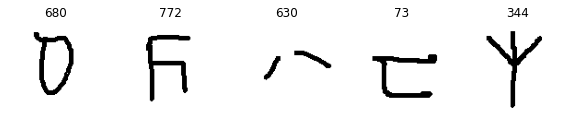

In [17]:
plotsample(omnist)

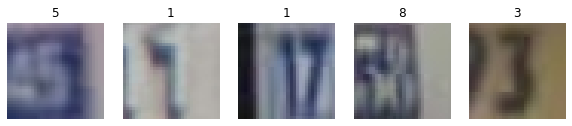

In [18]:
plotsample(svhn)

## 竞赛数据集

- ImageNet 用于识别
- COCO 微软 理解挑战赛CocoCaptions 图像理解：识别、标注
- VOC 用于分割检测 pytorch下载不稳定
- LSUN 景观识别

In [19]:
# LSUN 数据集下载解压后是LMBD格式的数据集，可以使用pytorch中datasets下的类来直接调用
# 导入一个类别
# 训练集
data_train = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_train"]
                                   ,transform=transforms.ToTensor())
data_train

Dataset LSUN
    Number of datapoints: 126227
    Root location: /Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data
    Classes: ['church_outdoor_train']
    StandardTransform
Transform: ToTensor()

In [20]:
# 验证集
data_val = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_val"]
                                   ,transform=transforms.ToTensor())
data_val

Dataset LSUN
    Number of datapoints: 300
    Root location: /Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data
    Classes: ['church_outdoor_val']
    StandardTransform
Transform: ToTensor()

In [21]:
data_val[0][0]

tensor([[[0.4627, 0.4627, 0.4667,  ..., 0.7137, 0.7098, 0.7098],
         [0.4627, 0.4627, 0.4667,  ..., 0.7255, 0.7176, 0.7098],
         [0.4627, 0.4627, 0.4667,  ..., 0.7333, 0.7255, 0.7176],
         ...,
         [0.3137, 0.3412, 0.3216,  ..., 0.6471, 0.6392, 0.6353],
         [0.1961, 0.2353, 0.2078,  ..., 0.6471, 0.6392, 0.6314],
         [0.1843, 0.2235, 0.1765,  ..., 0.6510, 0.6392, 0.6314]],

        [[0.5647, 0.5647, 0.5686,  ..., 0.7059, 0.7020, 0.7020],
         [0.5647, 0.5647, 0.5686,  ..., 0.7176, 0.7098, 0.7020],
         [0.5647, 0.5647, 0.5686,  ..., 0.7255, 0.7176, 0.7098],
         ...,
         [0.3176, 0.3451, 0.3216,  ..., 0.6510, 0.6431, 0.6392],
         [0.2000, 0.2392, 0.2118,  ..., 0.6510, 0.6431, 0.6353],
         [0.1882, 0.2275, 0.1804,  ..., 0.6549, 0.6431, 0.6353]],

        [[0.7882, 0.7882, 0.7922,  ..., 0.7098, 0.7059, 0.7059],
         [0.7882, 0.7882, 0.7922,  ..., 0.7216, 0.7137, 0.7059],
         [0.7882, 0.7882, 0.7922,  ..., 0.7294, 0.7216, 0.

In [22]:
data_val[0][0].shape # 要预处理（256，256）

torch.Size([3, 256, 341])

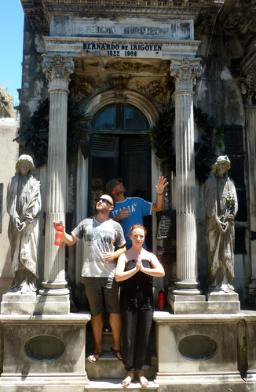

In [23]:
# 不加 ToTensor
data_train = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_train"])
data_train[0][0]

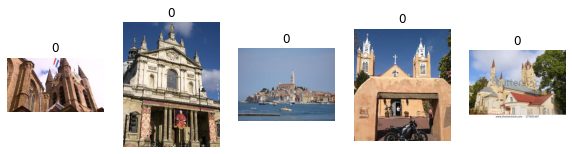

In [24]:
data_train = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_train"]
                                   ,transform=transforms.ToTensor())

plotsample(data_train)

In [25]:
for x,y in data_val:
    print(x.shape)
    print(y) # 标签全部是 0

torch.Size([3, 256, 341])
0
torch.Size([3, 341, 256])
0
torch.Size([3, 358, 256])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 383, 256])
0
torch.Size([3, 256, 360])
0
torch.Size([3, 256, 358])
0
torch.Size([3, 377, 256])
0
torch.Size([3, 341, 256])
0
torch.Size([3, 341, 256])
0
torch.Size([3, 256, 360])
0
torch.Size([3, 256, 292])
0
torch.Size([3, 341, 256])
0
torch.Size([3, 256, 256])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 256, 363])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 349, 256])
0
torch.Size([3, 256, 384])
0
torch.Size([3, 386, 256])
0
torch.Size([3, 271, 256])
0
torch.Size([3, 256, 340])
0
torch.Size([3, 256, 256])
0
torch.Size([3, 256, 380])
0
torch.Size([3, 256, 387])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 256, 383])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 386, 256])
0
torch.Size([3, 256, 446])
0
torch.Size([3, 256, 361])
0
torch.Size([3, 341, 256])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 376, 256])
0
torch.Size([3, 256, 

In [26]:
# 只导入一个类别时，该类别是没有标签的
check_ = 0
for x,y in data_val:
    check_+=y
check_

0

In [27]:
# 想要训练，至少需要导入两个类别
# 训练集
data_train = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_train","classroom_train"]
                                   ,transform=transforms.ToTensor())
# 验证集
data_val = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_val","classroom_val"]
                                   ,transform=transforms.ToTensor())

In [28]:
# 当导入两个类别时，标签会自动标注为0和1
for x,y in data_val:
    print(y)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [29]:
check_ = 0
for x,y in data_val:
    check_+=y
check_

300

## 其他常用数据集
- CIFAR10、CIFAR100 动物
- STL-10 10分类数据集、大部分用于无监督学习
- Cityscapes 城市 图像分割
- Places365 场景景观数据集 识别 400多个类别 由MIT支持
- CelebA 名人的脸

In [31]:
# CIFAR
data = torchvision.datasets.CIFAR10(root='/Users/feishuoren/Projects/pytorch_learning/Datasets/cifar'
                                   ,train=True
                                   ,download=False
                                   ,transform=transforms.ToTensor())
data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /Users/feishuoren/Projects/pytorch_learning/Datasets/cifar
    Split: Train
    StandardTransform
Transform: ToTensor()

In [32]:
for x,y in data:
    print(x,y)
    break

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [33]:
data.data.shape

(50000, 32, 32, 3)

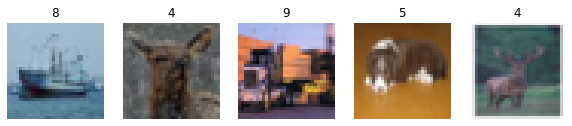

In [34]:
plotsample(data)

In [35]:
# CIFAR100
data100 = torchvision.datasets.CIFAR100(root='/Users/feishuoren/Projects/pytorch_learning/Datasets/cifar'
                                   ,train=True
                                   ,download=True
                                   ,transform=transforms.ToTensor())
data100

Files already downloaded and verified


Dataset CIFAR100
    Number of datapoints: 50000
    Root location: /Users/feishuoren/Projects/pytorch_learning/Datasets/cifar
    Split: Train
    StandardTransform
Transform: ToTensor()

In [37]:
import numpy as np
np.unique(data100.targets)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

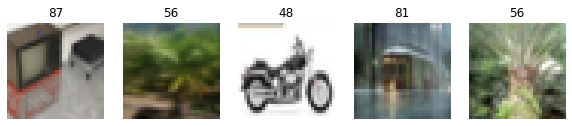

In [38]:
plotsample(data100)

## 自制数据集
- 导入自己的数据/图片作为数据集 ImageFolder类

In [42]:
# 训练集
train_dataset = torchvision.datasets.ImageFolder(root='/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train'
                                                 ,transform=torchvision.transforms.ToTensor())

In [43]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 12
    Root location: /Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train
    StandardTransform
Transform: ToTensor()

In [44]:
for x,y in train_dataset:
    print(x,y)
    break

tensor([[[0.1059, 0.1059, 0.1059,  ..., 0.0941, 0.0941, 0.0941],
         [0.1059, 0.1059, 0.1059,  ..., 0.0941, 0.0941, 0.0941],
         [0.1059, 0.1059, 0.1059,  ..., 0.0941, 0.0941, 0.0941],
         ...,
         [0.0000, 0.3922, 0.5020,  ..., 0.3490, 0.3451, 0.3451],
         [0.0275, 0.0000, 0.4471,  ..., 0.3490, 0.3451, 0.3451],
         [0.0000, 0.0706, 0.0314,  ..., 0.3490, 0.3451, 0.3451]],

        [[0.1529, 0.1529, 0.1529,  ..., 0.1255, 0.1255, 0.1255],
         [0.1529, 0.1529, 0.1529,  ..., 0.1255, 0.1255, 0.1255],
         [0.1529, 0.1529, 0.1529,  ..., 0.1255, 0.1255, 0.1255],
         ...,
         [0.0000, 0.3922, 0.5020,  ..., 0.3020, 0.2980, 0.2980],
         [0.0275, 0.0000, 0.4471,  ..., 0.3020, 0.2980, 0.2980],
         [0.0000, 0.0706, 0.0314,  ..., 0.3020, 0.2980, 0.2980]],

        [[0.2549, 0.2549, 0.2549,  ..., 0.2000, 0.2000, 0.2000],
         [0.2549, 0.2549, 0.2549,  ..., 0.2000, 0.2000, 0.2000],
         [0.2549, 0.2549, 0.2549,  ..., 0.2000, 0.2000, 0.

In [45]:
train_dataset.classes

['chu', 'shan']

In [46]:
train_dataset.targets

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [47]:
train_dataset[0][1] # 第1个数据的标签

0

In [49]:
train_dataset[11][1] # 第12个数据的标签

1

In [50]:
np.unique(train_dataset.targets)

array([0, 1])

In [51]:
# 查看具体的图像地址
train_dataset.imgs

[('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/chu/1553867782340.jpg',
  0),
 ('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/chu/1553867825068.jpg',
  0),
 ('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/chu/1553867861090.jpg',
  0),
 ('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/chu/1553873754112.jpg',
  0),
 ('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/chu/1553935285566.jpg',
  0),
 ('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/chu/1553935312538.jpg',
  0),
 ('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/shan/1559226216278.jpg',
  1),
 ('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/shan/1559228607396.jpg',
  1),
 ('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/shan/1559229080158.jpg',
  1),
 ('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/shan/15

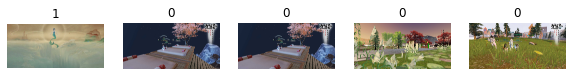

In [55]:
# 随机查看5张图像
plotsample(train_dataset)

**Dataset中规定，如果一个子类要继承Dataset，则必须在子类中定义__getitem__()方法**
该方法用来获取对象，必须满足三个功能：
1. 读取单个图片并转化为张量
2. 读取该图片对应的标签
3. 将该图片的张量与对应标签打包成一个样本并输出

该样本的形式时元祖，元祖中的第一个对象是图像张量，第二个对象是该图像对应的标签

In [56]:
import skimage

In [57]:
import pandas as pd
from skimage import io
import torch

In [59]:
# 读取一张图片
io.imread('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/shan/1559229080158.jpg')

array([[[123,  87,  53],
        [123,  87,  53],
        [123,  87,  53],
        ...,
        [ 88,  57,  37],
        [ 88,  57,  37],
        [ 88,  57,  37]],

       [[123,  87,  53],
        [123,  87,  53],
        [123,  87,  53],
        ...,
        [ 88,  57,  37],
        [ 88,  57,  37],
        [ 88,  57,  37]],

       [[123,  87,  53],
        [123,  87,  53],
        [123,  87,  53],
        ...,
        [ 88,  57,  37],
        [ 88,  57,  37],
        [ 88,  57,  37]],

       ...,

       [[ 75,  91,  90],
        [ 75,  91,  90],
        [ 75,  91,  90],
        ...,
        [ 77,  93,  92],
        [ 77,  93,  92],
        [ 77,  93,  92]],

       [[ 75,  91,  90],
        [ 75,  91,  90],
        [ 75,  91,  90],
        ...,
        [ 77,  93,  92],
        [ 77,  93,  92],
        [ 77,  93,  92]],

       [[ 75,  91,  90],
        [ 75,  91,  90],
        [ 75,  91,  90],
        ...,
        [ 77,  93,  92],
        [ 77,  93,  92],
        [ 77,  93,  92]]

In [ ]:
# 读取标签 - identity 个体识别标签
identity = pd.read_csv("")

In [73]:
imgpath_chu = '/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/chu/'
imgpath_shan = '/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/shan/'

import os

def getFiles(path):
    filenames = os.listdir(path)
    return filenames

targets = train_dataset.targets
chu = getFiles(imgpath_chu)
shan = getFiles(imgpath_shan)
names = [*chu,*shan]
names = list(filter(lambda x: ('.jpg' in x), names))

theImg = pd.DataFrame(list(zip(names,targets)))
# 合并完整地址 文件夹 + 名称
imgdic = os.path.join(imgpath_chu,theImg[0][0])
# 读取图片
io.imread(imgdic)

array([[[ 38,  44,  44],
        [ 22,  28,  28],
        [ 37,  43,  43],
        ...,
        [225, 227, 239],
        [225, 227, 239],
        [225, 227, 239]],

       [[ 49,  55,  55],
        [ 39,  45,  45],
        [ 51,  57,  57],
        ...,
        [225, 227, 239],
        [225, 227, 239],
        [225, 227, 239]],

       [[ 30,  39,  38],
        [ 29,  38,  37],
        [ 37,  46,  45],
        ...,
        [225, 227, 239],
        [225, 227, 239],
        [225, 227, 239]],

       ...,

       [[  0,   0,   5],
        [124, 125, 129],
        [129, 129, 131],
        ...,
        [187, 142, 103],
        [188, 143, 104],
        [187, 142, 103]],

       [[  0,   0,  10],
        [  0,   0,   7],
        [109, 108, 113],
        ...,
        [160, 115,  76],
        [169, 124,  85],
        [175, 130,  91]],

       [[  0,   0,  11],
        [  0,   0,   9],
        [  2,   1,   9],
        ...,
        [134,  89,  50],
        [149, 104,  65],
        [159, 114,  75]]

In [77]:
# 标签
theImg.iloc[0,1]

0

In [88]:
idx = 11
imgdic = os.path.join(imgpath_shan,theImg.iloc[idx,0]) # 图像目录
image = io.imread(imgdic) # 提取出的索引为idx的图像的像素值矩阵
label = theImg.iloc[idx,1]
sample = (image,label)
tensor_sample = (torch.tensor(image),int(label))
sample

(array([[[102,  83,  43],
         [102,  83,  43],
         [102,  83,  43],
         ...,
         [134, 108,  57],
         [134, 108,  57],
         [134, 108,  57]],
 
        [[102,  83,  43],
         [102,  83,  43],
         [102,  83,  43],
         ...,
         [134, 108,  57],
         [134, 108,  57],
         [134, 108,  57]],
 
        [[102,  83,  43],
         [102,  83,  43],
         [102,  83,  43],
         ...,
         [134, 108,  57],
         [134, 108,  57],
         [134, 108,  57]],
 
        ...,
 
        [[ 61,  90, 106],
         [ 61,  90, 106],
         [ 61,  90, 106],
         ...,
         [ 54,  78,  78],
         [ 53,  77,  77],
         [ 52,  76,  76]],
 
        [[ 62,  91, 107],
         [ 62,  91, 107],
         [ 62,  91, 107],
         ...,
         [ 56,  80,  80],
         [ 55,  79,  79],
         [ 54,  78,  78]],
 
        [[ 63,  92, 108],
         [ 62,  91, 107],
         [ 61,  90, 106],
         ...,
         [ 58,  82,  82],
  

In [89]:
tensor_sample

(tensor([[[102,  83,  43],
          [102,  83,  43],
          [102,  83,  43],
          ...,
          [134, 108,  57],
          [134, 108,  57],
          [134, 108,  57]],
 
         [[102,  83,  43],
          [102,  83,  43],
          [102,  83,  43],
          ...,
          [134, 108,  57],
          [134, 108,  57],
          [134, 108,  57]],
 
         [[102,  83,  43],
          [102,  83,  43],
          [102,  83,  43],
          ...,
          [134, 108,  57],
          [134, 108,  57],
          [134, 108,  57]],
 
         ...,
 
         [[ 61,  90, 106],
          [ 61,  90, 106],
          [ 61,  90, 106],
          ...,
          [ 54,  78,  78],
          [ 53,  77,  77],
          [ 52,  76,  76]],
 
         [[ 62,  91, 107],
          [ 62,  91, 107],
          [ 62,  91, 107],
          ...,
          [ 56,  80,  80],
          [ 55,  79,  79],
          [ 54,  78,  78]],
 
         [[ 63,  92, 108],
          [ 62,  91, 107],
          [ 61,  90, 106],
   

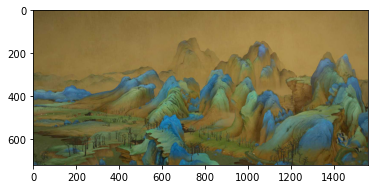

In [90]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [91]:
from torch.utils.data import Dataset

In [93]:
class CustomDataset(Dataset):
    def __init__(self,csv_file,root_dir):
        super().__init__()
        self.identity = pd.read_csv(csv_file,sep=" ",header=None)
        self.root_dir = root_dir
        
    def __getitem__(self,idx):
        imgdic = os.path.join(self.root_dir,self.identity.iloc[idx,0]) # 图像目录
        image = io.imread(imgdic) # 提取出的索引为idx的图像的像素值矩阵
        label = self.identity.iloc[idx,1]
        sample = (image,label)
        
        return sample

In [94]:
theImg.to_csv('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/theImg.txt', sep=' ', index=False)

In [95]:
csvpath = r'/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/theImg.txt'

In [96]:
data = CustomDataset(csvpath,imgpath_shan)

In [97]:
data

In [99]:
data[11]

(array([[[123,  87,  53],
         [123,  87,  53],
         [123,  87,  53],
         ...,
         [ 88,  57,  37],
         [ 88,  57,  37],
         [ 88,  57,  37]],
 
        [[123,  87,  53],
         [123,  87,  53],
         [123,  87,  53],
         ...,
         [ 88,  57,  37],
         [ 88,  57,  37],
         [ 88,  57,  37]],
 
        [[123,  87,  53],
         [123,  87,  53],
         [123,  87,  53],
         ...,
         [ 88,  57,  37],
         [ 88,  57,  37],
         [ 88,  57,  37]],
 
        ...,
 
        [[ 75,  91,  90],
         [ 75,  91,  90],
         [ 75,  91,  90],
         ...,
         [ 77,  93,  92],
         [ 77,  93,  92],
         [ 77,  93,  92]],
 
        [[ 75,  91,  90],
         [ 75,  91,  90],
         [ 75,  91,  90],
         ...,
         [ 77,  93,  92],
         [ 77,  93,  92],
         [ 77,  93,  92]],
 
        [[ 75,  91,  90],
         [ 75,  91,  90],
         [ 75,  91,  90],
         ...,
         [ 77,  93,  92],
  

In [101]:
class CustomDataset(Dataset):
    def __init__(self,csv_file,root_dir):
        super().__init__()
        self.identity = pd.read_csv(csv_file,sep=" ",header=None)
        self.root_dir = root_dir
    
    def __len__(self):
        # 展示数据中国年总共有多少样本
        return len(self.identity)
    
    def __getitem__(self,idx):
        imgdic = os.path.join(self.root_dir,self.identity.iloc[idx,0]) # 图像目录
        image = io.imread(imgdic) # 提取出的索引为idx的图像的像素值矩阵
        label = self.identity.iloc[idx,1]
        sample = (image,label)
        
        return sample

In [125]:
theImgChu = theImg[theImg[1]==0]
theImgShan = theImg[theImg[1]==1]
theImgChu.to_csv('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/theImgChu.txt', sep=' ', header=None, index=False)
theImgShan.to_csv('/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/theImgShan.txt', sep=' ', header=None, index=False)

In [109]:
csvpath_chu = r'/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/theImgChu.txt'
csvpath_shan = r'/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/theImgShan.txt'

In [110]:
data_chu = CustomDataset(csvpath_chu,imgpath_chu)
data_shan = CustomDataset(csvpath_shan,imgpath_shan)

In [111]:
data_chu[3]

(array([[[ 27,  39,  65],
         [ 27,  39,  65],
         [ 27,  39,  65],
         ...,
         [ 24,  32,  51],
         [ 24,  32,  51],
         [ 24,  32,  51]],
 
        [[ 27,  39,  65],
         [ 27,  39,  65],
         [ 27,  39,  65],
         ...,
         [ 24,  32,  51],
         [ 24,  32,  51],
         [ 24,  32,  51]],
 
        [[ 27,  39,  65],
         [ 27,  39,  65],
         [ 27,  39,  65],
         ...,
         [ 24,  32,  51],
         [ 24,  32,  51],
         [ 24,  32,  51]],
 
        ...,
 
        [[  0,   0,   2],
         [100, 100, 102],
         [128, 128, 130],
         ...,
         [ 89,  77,  77],
         [ 88,  76,  76],
         [ 88,  76,  76]],
 
        [[  7,   7,   9],
         [  0,   0,   2],
         [114, 114, 116],
         ...,
         [ 89,  77,  77],
         [ 88,  76,  76],
         [ 88,  76,  76]],
 
        [[  0,   0,   2],
         [ 18,  18,  20],
         [  8,   8,  10],
         ...,
         [ 89,  77,  77],
  

In [112]:
data_chu.__len__()

7

In [113]:
data_shan.__len__()

7

In [114]:
class CustomDataset(Dataset):
    def __init__(self,csv_file,root_dir):
        super().__init__()
        self.identity = pd.read_csv(csv_file,sep=" ",header=None)
        self.root_dir = root_dir
    
    def __len__(self):
        # 展示数据中国年总共有多少样本
        return len(self.identity)
    
    def __info__(self):
        print("CustomData")
        print("\t Number of samples: {}".format(len(self.identity)))
        print("\t Number of classes: {}".format(len(np.unique(self.identity.iloc[:,1]))))
        print("\t root_dir: {}".format(self.root_dir))
    
    def __getitem__(self,idx):
        imgdic = os.path.join(self.root_dir,self.identity.iloc[idx,0]) # 图像目录
        image = io.imread(imgdic) # 提取出的索引为idx的图像的像素值矩阵
        label = self.identity.iloc[idx,1]
        sample = (image,label)
        
        return sample

In [115]:
data_chu = CustomDataset(csvpath_chu,imgpath_chu)
data_shan = CustomDataset(csvpath_shan,imgpath_shan)

In [116]:
data_shan.__info__()

CustomData
	 Number of samples: 7
	 Number of classes: 1
	 root_dir: /Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/shan/


In [121]:
# transform

class CustomDataset(Dataset):
    """
    自定义数据集，用于读取数据集中的个体识别（identity recognition）数据的标签和图像
    图像格式为jpg
    """
    def __init__(self,csv_file,root_dir,transform=None):
        """
        参数说明：
            csv_file（字符串）：标签csv/txt的具体地址
            root_dir（string）：所有图片所在的根目录
            transform（callable, optional）：选填，需要对样本进行的预处理
        """
        super().__init__()
        self.identity = pd.read_csv(csv_file,sep=" ",header=None)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        # 展示数据中国年总共有多少样本
        return len(self.identity)
    
    def __info__(self):
        print("CustomData")
        print("\t Number of samples: {}".format(len(self.identity)))
        print("\t Number of classes: {}".format(len(np.unique(self.identity.iloc[:,1]))))
        print("\t root_dir: {}".format(self.root_dir))
    
    def __getitem__(self,idx):
        # 保证 idx 不是一个 tensor
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        imgdic = os.path.join(self.root_dir,self.identity.iloc[idx,0]) # 图像目录
        image = io.imread(imgdic) # 提取出的索引为idx的图像的像素值矩阵
        label = self.identity.iloc[idx,1]
        
        if self.transform != None:
            image = self.transform(image)
            
        sample = (image,label)
        
        return sample

In [126]:
data_chu = CustomDataset(csvpath_chu,imgpath_chu)
data_shan = CustomDataset(csvpath_shan,imgpath_shan)

In [127]:
for x,y in data_shan:
    print(x.shape)
    print(y)
    break

(720, 1560, 3)
1


In [144]:
# dataframe.iloc[0,0].split() # 默认按空格进行分类，并且会把多个空格当成一个空格
"""空格间隔不一样时的数据文件处理
"""
test_path ='/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/Test_Attr.txt'
df = pd.read_csv(test_path,header=None)
columns = df.iloc[0,0].split()
len_columns = len(columns)
data = df.iloc[1:,0].str.split().tolist()
df = pd.DataFrame(data,columns=columns)
df

,name,label,attr1,attr2
0,1553873754112.jpg,0,'dd1','ddf3'
1,1553867825068.jpg,0,'dew1','ddwer3'
2,1553867782340.jpg,0,'dd23','dwrtwf3'
3,1553935312538.jpg,0,'dd1','dwerqe3'
4,1553867861090.jpg,0,'dd4t','ddwer'
5,1553935285566.jpg,0,'dsf1','dyt3'


In [149]:
# transform

class CustomDataset_attr(Dataset):
    """
    自定义数据集，用于读取数据集中的属性识别（attribute recognition）数据的标签和图像
    图像格式为jpg
    """
    def __init__(self,csv_file,root_dir,labelname,transform=None):
        """
        参数说明：
            csv_file（字符串）：标签csv/txt的具体地址
            root_dir（string）：所有图片所在的根目录
            transform（callable, optional）：选填，需要对样本进行的预处理
        """
        super().__init__()
        self.attr_ = pd.read_csv(csv_file,header=None)
        self.root_dir = root_dir
        self.labelname = labelname
        self.transform = transform
    
    def __len__(self):
        # 展示数据中国年总共有多少样本
        return len(self.attr_)
    
    def __info__(self):
        print("CustomData")
        print("\t Number of samples: {}".format(len(self.attr_)-1))
        print("\t root_dir: {}".format(self.root_dir))
    
    def __getitem__(self,idx):
        # 保证 idx 不是一个 tensor
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        self.attr_ = pd.DataFrame(self.attr_.iloc[1:,0].str.split().tolist()
                                  ,columns=self.attr_.iloc[0,0].split())

        imgdic = os.path.join(self.root_dir,self.attr_.iloc[idx,0]) # 图像目录
        image = io.imread(imgdic) # 提取出的索引为idx的图像的像素值矩阵
        label = self.attr_.loc[idx,self.labelname]
        
        if self.transform != None:
            image = self.transform(image)
            
        sample = (image,label)
        
        return sample

In [150]:
labelname = 'attr1'
csvpath_test = r'/Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/Test_Attr.txt'
data_attr = CustomDataset_attr(csvpath_test,imgpath_chu,labelname)

In [151]:
data_attr

In [152]:
data_attr.__info__()

CustomData
	 Number of samples: 6
	 root_dir: /Users/feishuoren/Projects/pytorch_learning/Datasets/myDataset/Train/chu/


In [153]:
data_attr[4]

(array([[[ 24,  32,  51],
         [ 24,  32,  51],
         [ 24,  32,  51],
         ...,
         [ 27,  28,  46],
         [ 27,  28,  46],
         [ 27,  28,  46]],
 
        [[ 24,  32,  51],
         [ 24,  32,  51],
         [ 24,  32,  51],
         ...,
         [ 27,  28,  46],
         [ 27,  28,  46],
         [ 27,  28,  46]],
 
        [[ 24,  32,  51],
         [ 24,  32,  51],
         [ 24,  32,  51],
         ...,
         [ 27,  28,  46],
         [ 27,  28,  46],
         [ 27,  28,  46]],
 
        ...,
 
        [[  0,   0,   4],
         [122, 123, 127],
         [129, 130, 134],
         ...,
         [ 43,  44,  62],
         [ 40,  41,  59],
         [ 38,  39,  57]],
 
        [[  0,   0,   4],
         [ 11,  12,  16],
         [125, 126, 130],
         ...,
         [ 46,  47,  65],
         [ 44,  45,  63],
         [ 43,  44,  62]],
 
        [[  9,  10,  14],
         [  0,   0,   4],
         [  0,   0,   4],
         ...,
         [ 50,  51,  69],
  

In [ ]:
# PyTorch 和 skimage 在读取图片数据集时，并不会将所有的图片提取出来放入缓存
# 而是对每一张图片进行读取后，只存储他的PIL格式或像素表示，因此几十G的数据集也可以轻松的被读入jupyter/pycharm
# 相对的假设cvs文件特别大，读取会比较困难

## 将二维表转化为四维 tensor (使用csv/txt 创建数据集)

In [176]:
data = np.random.randint(0,255,(10,10000)) # 假设10个样本，每个样本10000个特征

data.shape

(10, 10000)

In [177]:
data = data.reshape(10,1,100,100) # 可以直接使用reshape的方式将数据调整为4维

data

array([[[[ 43, 198, 155, ...,  18, 239, 168],
         [ 48, 152, 127, ..., 113, 131, 237],
         [  7, 145, 228, ..., 203, 225, 144],
         ...,
         [240, 122,   7, ...,  28,  55, 243],
         [241,  97, 222, ..., 128, 249,  24],
         [  6,  57,  12, ...,  60, 138,  27]]],


       [[[ 80,  22,  97, ...,   2,  83, 230],
         [195, 245, 243, ..., 253, 172, 231],
         [223, 203, 132, ...,  24, 173, 242],
         ...,
         [232, 195,  85, ..., 251, 177, 158],
         [116, 150, 106, ..., 138, 102, 187],
         [200, 151,  37, ...,  20, 141, 242]]],


       [[[114,  96,  69, ..., 170, 245, 115],
         [ 99, 144, 239, ..., 225, 200, 244],
         [121, 173, 136, ..., 188, 154, 249],
         ...,
         [163,  68, 194, ...,  53, 150, 163],
         [ 73, 117, 211, ..., 221, 225,  35],
         [ 66, 121, 143, ..., 148,  53,  45]]],


       ...,


       [[[230,  92,  77, ...,   2, 156,  88],
         [205, 169, 159, ...,  25, 125, 154],
         [ 9

In [178]:
data = torch.tensor(data) # 再放入tensor中转换格式

data

tensor([[[[ 43, 198, 155,  ...,  18, 239, 168],
          [ 48, 152, 127,  ..., 113, 131, 237],
          [  7, 145, 228,  ..., 203, 225, 144],
          ...,
          [240, 122,   7,  ...,  28,  55, 243],
          [241,  97, 222,  ..., 128, 249,  24],
          [  6,  57,  12,  ...,  60, 138,  27]]],


        [[[ 80,  22,  97,  ...,   2,  83, 230],
          [195, 245, 243,  ..., 253, 172, 231],
          [223, 203, 132,  ...,  24, 173, 242],
          ...,
          [232, 195,  85,  ..., 251, 177, 158],
          [116, 150, 106,  ..., 138, 102, 187],
          [200, 151,  37,  ...,  20, 141, 242]]],


        [[[114,  96,  69,  ..., 170, 245, 115],
          [ 99, 144, 239,  ..., 225, 200, 244],
          [121, 173, 136,  ..., 188, 154, 249],
          ...,
          [163,  68, 194,  ...,  53, 150, 163],
          [ 73, 117, 211,  ..., 221, 225,  35],
          [ 66, 121, 143,  ..., 148,  53,  45]]],


        ...,


        [[[230,  92,  77,  ...,   2, 156,  88],
          [205, 

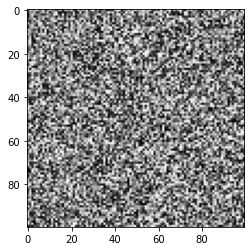

In [191]:
plt.imshow(data.view(-1,100,100,1)[0][:,:,0], cmap='gray')

In [204]:
data.view(-1,100,100,1)[0][:,:,0]

tensor([[ 43, 198, 155,  ...,  18, 239, 168],
        [ 48, 152, 127,  ..., 113, 131, 237],
        [  7, 145, 228,  ..., 203, 225, 144],
        ...,
        [240, 122,   7,  ...,  28,  55, 243],
        [241,  97, 222,  ..., 128, 249,  24],
        [  6,  57,  12,  ...,  60, 138,  27]])

In [205]:
data.view(-1,100,100,1)[0]

tensor([[[ 43],
         [198],
         [155],
         ...,
         [ 18],
         [239],
         [168]],

        [[ 48],
         [152],
         [127],
         ...,
         [113],
         [131],
         [237]],

        [[  7],
         [145],
         [228],
         ...,
         [203],
         [225],
         [144]],

        ...,

        [[240],
         [122],
         [  7],
         ...,
         [ 28],
         [ 55],
         [243]],

        [[241],
         [ 97],
         [222],
         ...,
         [128],
         [249],
         [ 24]],

        [[  6],
         [ 57],
         [ 12],
         ...,
         [ 60],
         [138],
         [ 27]]])

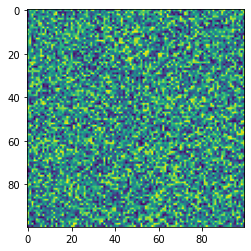

In [206]:
plt.imshow(data.view(-1,100,100,1)[0][:,:,0])

In [211]:
np.full((100,100,3),21)

array([[[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]]])

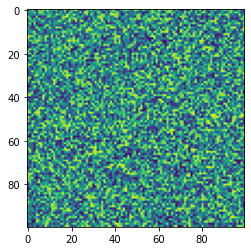

In [230]:
plt.imshow(np.random.randint(0,255,(100,100)))

In [253]:
torch.tensor(np.random.randint(0,255,(10,10000)).reshape(10,1,100,100)).view(-1,100,100,1)[0][:,:,0]

tensor([[ 33, 130,  40,  ..., 109, 168,  72],
        [216, 105, 118,  ...,  83, 112, 144],
        [122, 216, 172,  ..., 249,  16, 137],
        ...,
        [122, 253, 212,  ...,  89,   4,  35],
        [157,  36,  85,  ...,   0,  79, 212],
        [ 45,  37, 114,  ..., 118,  77,  80]])

4
3
2


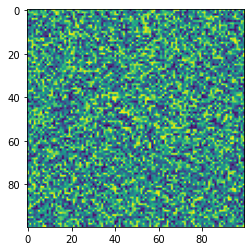

In [264]:
test_gray = torch.tensor(np.random.randint(0,255,(10,10000)).reshape(10,1,100,100)).view(-1,100,100,1)
print(test_gray.ndim)
print(test_gray[0].ndim)
print(test_gray[0][:,:,0].ndim)
plt.imshow(test_gray[0][:,:,0])

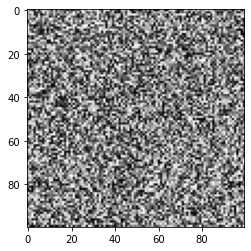

In [261]:
plt.imshow(test_gray[0][:,:,0],cmap='gray')

In [265]:
from sklearn.preprocessing import PolynomialFeatures as PF

In [266]:
# 如果原始数据是一维的(维度：特征数目)
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [267]:
# 二次多项式，参数 degree 控制多项式的次方
poly = PF(degree = 2) # 升维过程中，允许在特征x上设置的最高次方

In [268]:
# 接口 transform 直接调用
X_ = poly.fit_transform(X)
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [269]:
X_.shape

(3, 3)

In [270]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [271]:
PF(degree = 2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [272]:
PF(degree = 3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [ ]:
# 按列增加 X 的 n 次方（n=0,1,2,...）
# 多项式变化是对原始特征进行重组后形成新的特征，并没有在原始特征基础上进行深层特征提取
# 因此当原始特征本来就非常少时，多项式变化非常容易导致过拟合

In [ ]:
# 导入 mat/pt格式文件
"""
import torch
X,y = torch.load(r"../test.pt")

import scipy.io as sio
import numpy as np
import torch

loaded_mat = sio.loadmat(r'../test.mat')
X = torch.tensor(loaded_mat['X'])
"""

In [ ]:
# 导入 lmdb 格式文件
# 自定义构造读取单一的 lmdb 文件的类 ImageFolderMDB

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import six
import string
import pickle
import bisect
import lmdb
from PIL import Image
import torch
from torch.utils.data import DataLoader, Dataset, IterableDataset
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from torchvision import transforms, datasets

class ImageFolderLMDB(Dataset):
    """
    用于从单一lmdb文件中提取出数据集的类 
    只适用于lmdb文件中只包含一个标签类别的情况 
    不同的标签类别需要使用不同的ImageFolderLMDB进行提取 
    """
    def __init__(self, db_path, classes: int, transform=None,target_transform=None):
        """
        参数说明
        db_path: 字符串，需要读取的lmdb文件所在的根目录
        classes: int，给现有数据集打上的单一标签。注意该标签是人工标注的，不一定是数据中心的客观标签
        """
        super().__init__()
        self.db_path = db_path
        self.classes = classes
        self.transform = transform
        self.target_transform = target_transform

        #首先使用lmdb库从lmdb文件中提出数据集
        self.env = lmdb.open(db_path, max_readers=1, readonly=True, lock=False,
                             readahead=False, meminit=False)
        with self.env.begin(write=False) as txn:
            self.length = txn.stat()['entries']
        cache_file = '_cache_' + ''.join(c for c in db_path if c in string.ascii_letters)
        
        if os.path.isfile(cache_file):
            self.keys = pickle.load(open(cache_file, "rb")) 
        elsI:
            with self.env.begin(write=False) as txn:
                self.keys = [key for key in txn.cursor().iternext(keys=True,values=False)]
            pickle.dump(self.keys, open(cache_file, "wb"))
            
    def __getitem__(self, index):
        img, target = None, None
        env = self.env
        with env.begin(write=False) as txn:
            imgbuf = txn.get(self.keys[index])
        # 导入图像
        buf = six.BytesIO() buf.write(imgbuf)
        buf.seek(0)
        img = Image.open(buf).convert('RGB')
        # 导入标签
        target = self.classes
        
        if self.transform is not NonI:
            img = self.transform(img)
            
        if self.target_transform is not NonI:
            target = self.target_transform(target)
            
            return img, target
        
    def __len__(self):
        return self.length
    
    def __repr__(self):
        return self.__class__.__name__ + ' (' + self.db_path + ')'

## 图像数据预处理
放入网络钱，要确保：
1. 全部样本的尺寸是一致的（同时，通道数一致）
2. 图像最终以Tensor形式被输入到卷积网络
3. 图像被恰当的归一化

前两项是为了卷积神经网络能够顺利的运行
第三项是为了让训练过程变得更加流畅快速

PyTorch中，所有的数据预处理都可以在导入数据的时候，通过transform参数完成

In [278]:
# 1). 尺寸调整
# 大小：经典网络的输入224 / 227，其他的要改变网络深度
# 方法：裁剪(丢弃信息)、像素聚类/像素插补（保留信息）
# 如：Compose(打包)\CenterCrop\Resize\Normalize\ToTensor

# 一般会结合使用两个类：
# 中心裁剪transforms.CenterCrop()以及transforms.Resize()

import torch
import torchvision
from torchvision import transforms
from torch import nn

# 方形
transform1 = transforms.Compose([transforms.Resize(256)
                                ,transforms.CenterCrop(224)])
# 相当于
transform2 = nn.Sequential(transforms.Resize(256)
                           ,transforms.CenterCrop(224))

# 矩形
# transform = transforms.Compose([transforms.Resize((256,225))
#                                 ,transforms.CenterCrop(224)])

In [279]:
transform1

Compose(
    Resize(size=256, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(224, 224))
)

In [280]:
transform2

Sequential(
  (0): Resize(size=256, interpolation=PIL.Image.BILINEAR)
  (1): CenterCrop(size=(224, 224))
)

In [281]:
# 2). ToTensor
# 发生在尺寸裁剪之后

# 3). 归一化 Normalize()
# 改变数字，不改变分布
# 以通道为单位归一化，减去均值除以标准差
# 很难从数学的角度得到归一化处理有用，但从实验结果上看是有用的

# transforms.ToTensor()带有归一化的功能
# 这个类按照最大值255，最小值0对图片数据进行归一化，将所有图像的像素值压缩到【0，1】之间

In [282]:
data_val = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_val","classroom_val"]
                                   ,transform=transforms.ToTensor())
data_val

Dataset LSUN
    Number of datapoints: 600
    Root location: /Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data
    Classes: ['church_outdoor_val', 'classroom_val']
    StandardTransform
Transform: ToTensor()

In [283]:
data_val[0][0].max(),data_val[0][0].min() # 所有的值在0-1之间

(tensor(1.), tensor(0.))

In [284]:
# 常见 Normalize 填写方式
# 1）三通道图像
transforms.Normalize(mean=[0.5,0.5,0.5], # 代表三个通道上需要减去的值分别是0.5
                    std=[0.5,0.5,0.5]) # 代表三个通道上需要除以的值分别是0.5
# 在保证数据范围在0-1的前提下，使用这个值可以令数据范围拓展到-1到1

# 也可以写作：
transforms.Normalize(0.5,0.5)
# 这种写法对任意通道数的图像都可以使用

# 注意区分，这种写法只适用于单通道（灰度）图像
transforms.Normalize([0.5],[0.5])

# 2) ImageNet 数据集上的均值和方差，可被用于任意实物照片分类
transforms.Normalize(mean=[0.452,0.456,0.406],
                    std=[0.229,0.224,0.225])

# 3) MNIST 数据集上的均值和方差，可被用于 MNIST系列
transforms.Normalize((0.1307), (0.3081))

Normalize(mean=0.1307, std=0.3081)

In [285]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(mean=[0.485,0.456,0.406],
                                                   std=[0.229,0.224,0.225])])

transform1 = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(0.5,0.5)])

data_val = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_val","classroom_val"]
                                   ,transform=transform
                                    )
data_val[0][0].max(),data_val[0][0].min()

(tensor(2.6400), tensor(-2.1179))

In [288]:
data_val = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_val","classroom_val"]
                                   ,transform=transform1
                                    )
data_val[1][0].max(),data_val[1][0].min() # -1,1之间

(tensor(1.), tensor(-0.8824))